#### 1.- Librerías utilizadas

In [1]:
import pandas as pd #Manipulacion de datos
import numpy as np #Procesamiento de datos
#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

#### 2.- Carga de datos

In [2]:
df = sns.load_dataset("titanic")
#df = pd.read_csv('titanic.csv',sep = ",",encoding = 'latin1')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


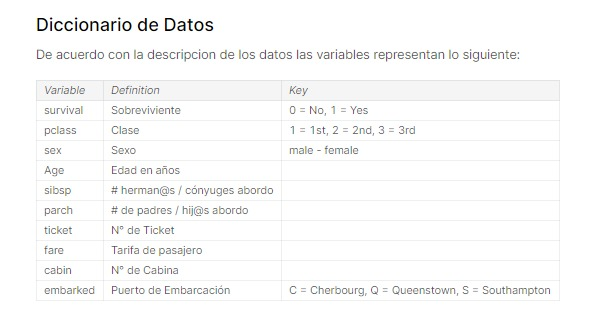

#### 3.- Manipulación de datos

In [4]:
df.shape

(891, 15)

In [5]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
#Eliminamos la variables deck porque no conocemos su significado
df.drop(['deck'], axis=1, inplace=True)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True


Especificaciones del Caso Práctico - Titanic:

A partir del caso presentado, se solicita lo siguiente:

Entregable:

Entendimiento de Datos:
   - 5 insights o hallazgos relevantes del caso de uso

Tratamiento de datos:
   - Reducir la dimensionalidad en caso sea necesario
   - Aplicar un cambio de distribución de la variable numérica en caso sea necesario
   - Convertir variables categóricas a numericas
   - Seleccionar variables + importantes

#### 4.Entendimiento de Datos

##### 4.1. Variables cuantitativas

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [8]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [9]:
import missingno as msno

<Axes: >

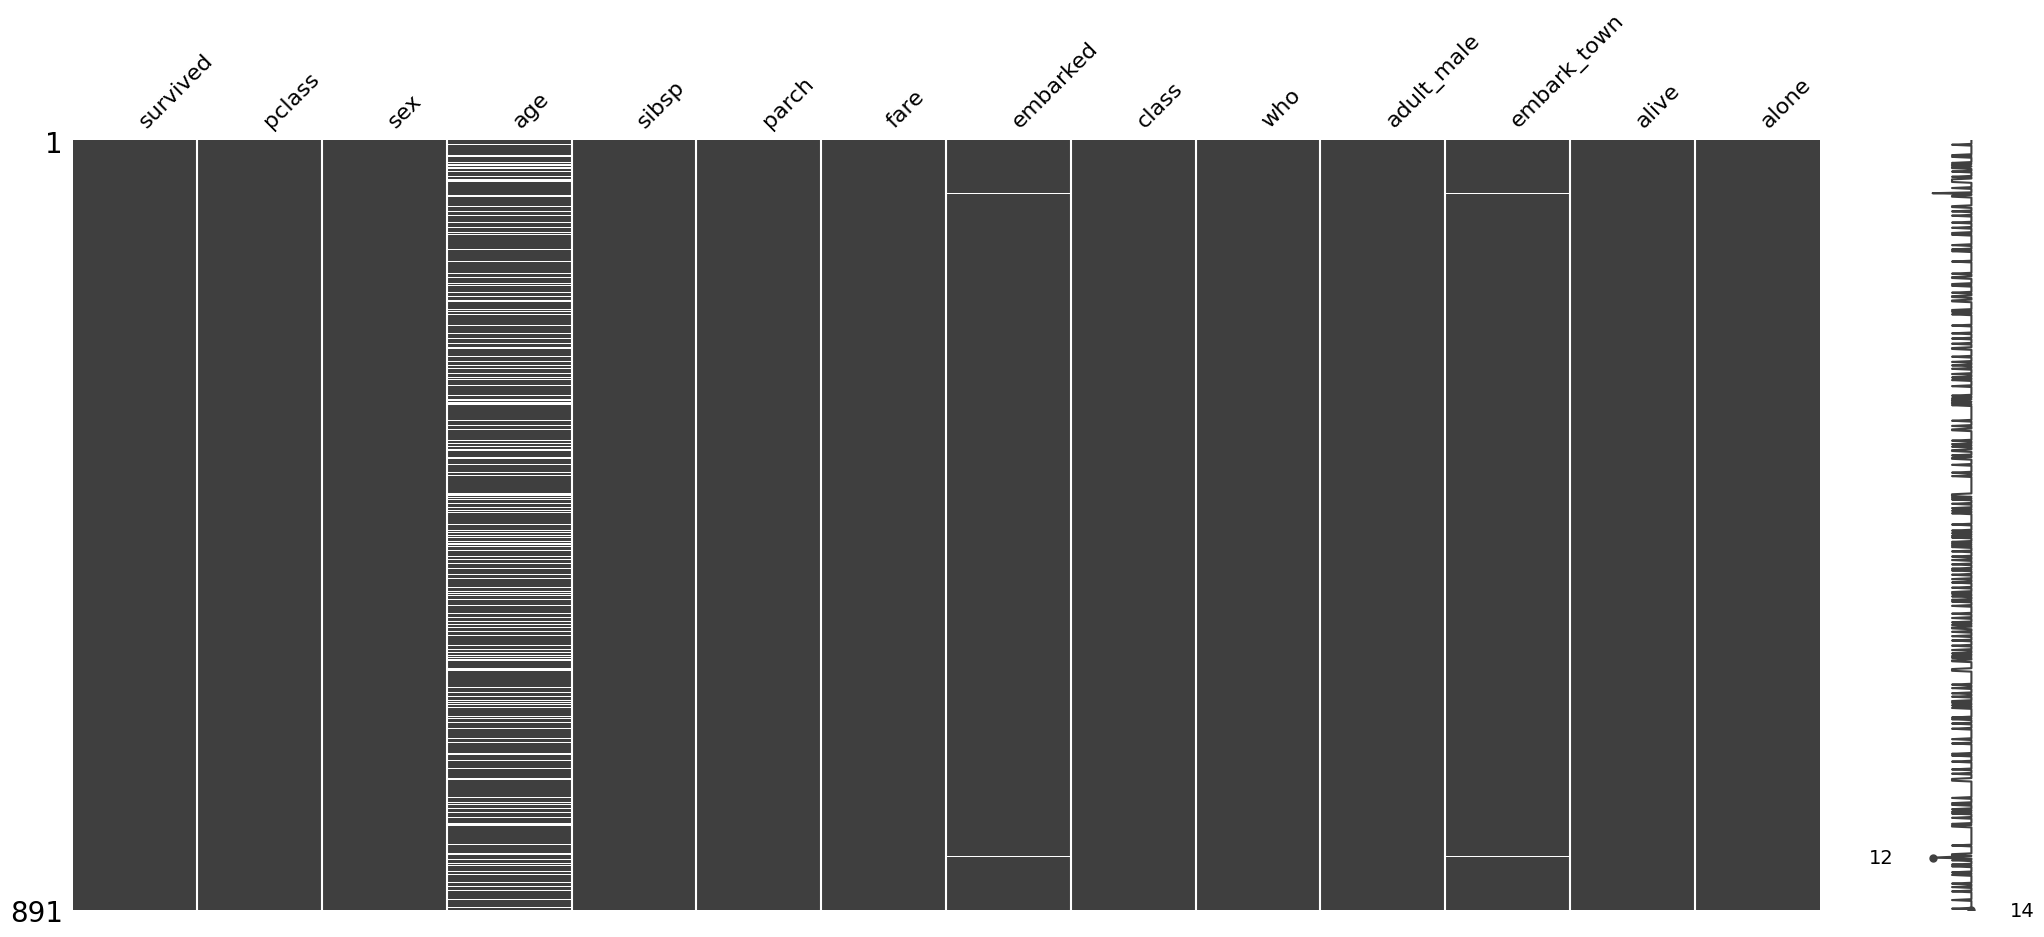

In [10]:
#Analizamos los valores nulos de Age y Embark
msno.matrix(df)

**Hallazgo 1:** La variable AGE se debe imputar debido a que observamos que los valores nulos se da a lo largo de la distribución, en cambio la variable EMBARKED debemos eliminar los 2 registros puntuales.

,0
survived,
0,549
1,342


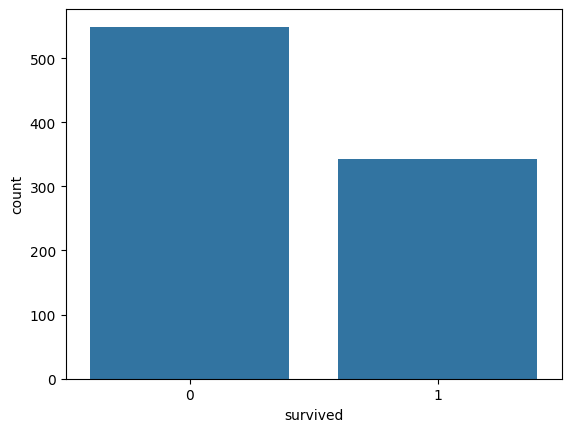

In [11]:
#Realizamos la distribución de la variables Target
sns.countplot(data = df, x = "survived")
df.groupby('survived').size()
#df['survived'].value_counts(1).sort_index

In [12]:
342/891

0.3838383838383838

**Hallazgo 2:** De todos los tripulantes que se encontraban en el Titanic, el 38% de personas ha sobrevivido.

In [13]:
#Calculamos las principales medidas estadísticas
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Hallazgo 3:**

- De la variable "Age", el promedio es **mayor** que su desviación y además tiene un valor similar a la mediana por lo que podemos afirmar que no existe valores atipicos extremos.

- De la variable "Fare", el promedio es **menor** que su desviación y además se encuentra alejada de la mediana por lo que podemos afirmar que existen valores atipicos extremos.

In [14]:
Variables = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

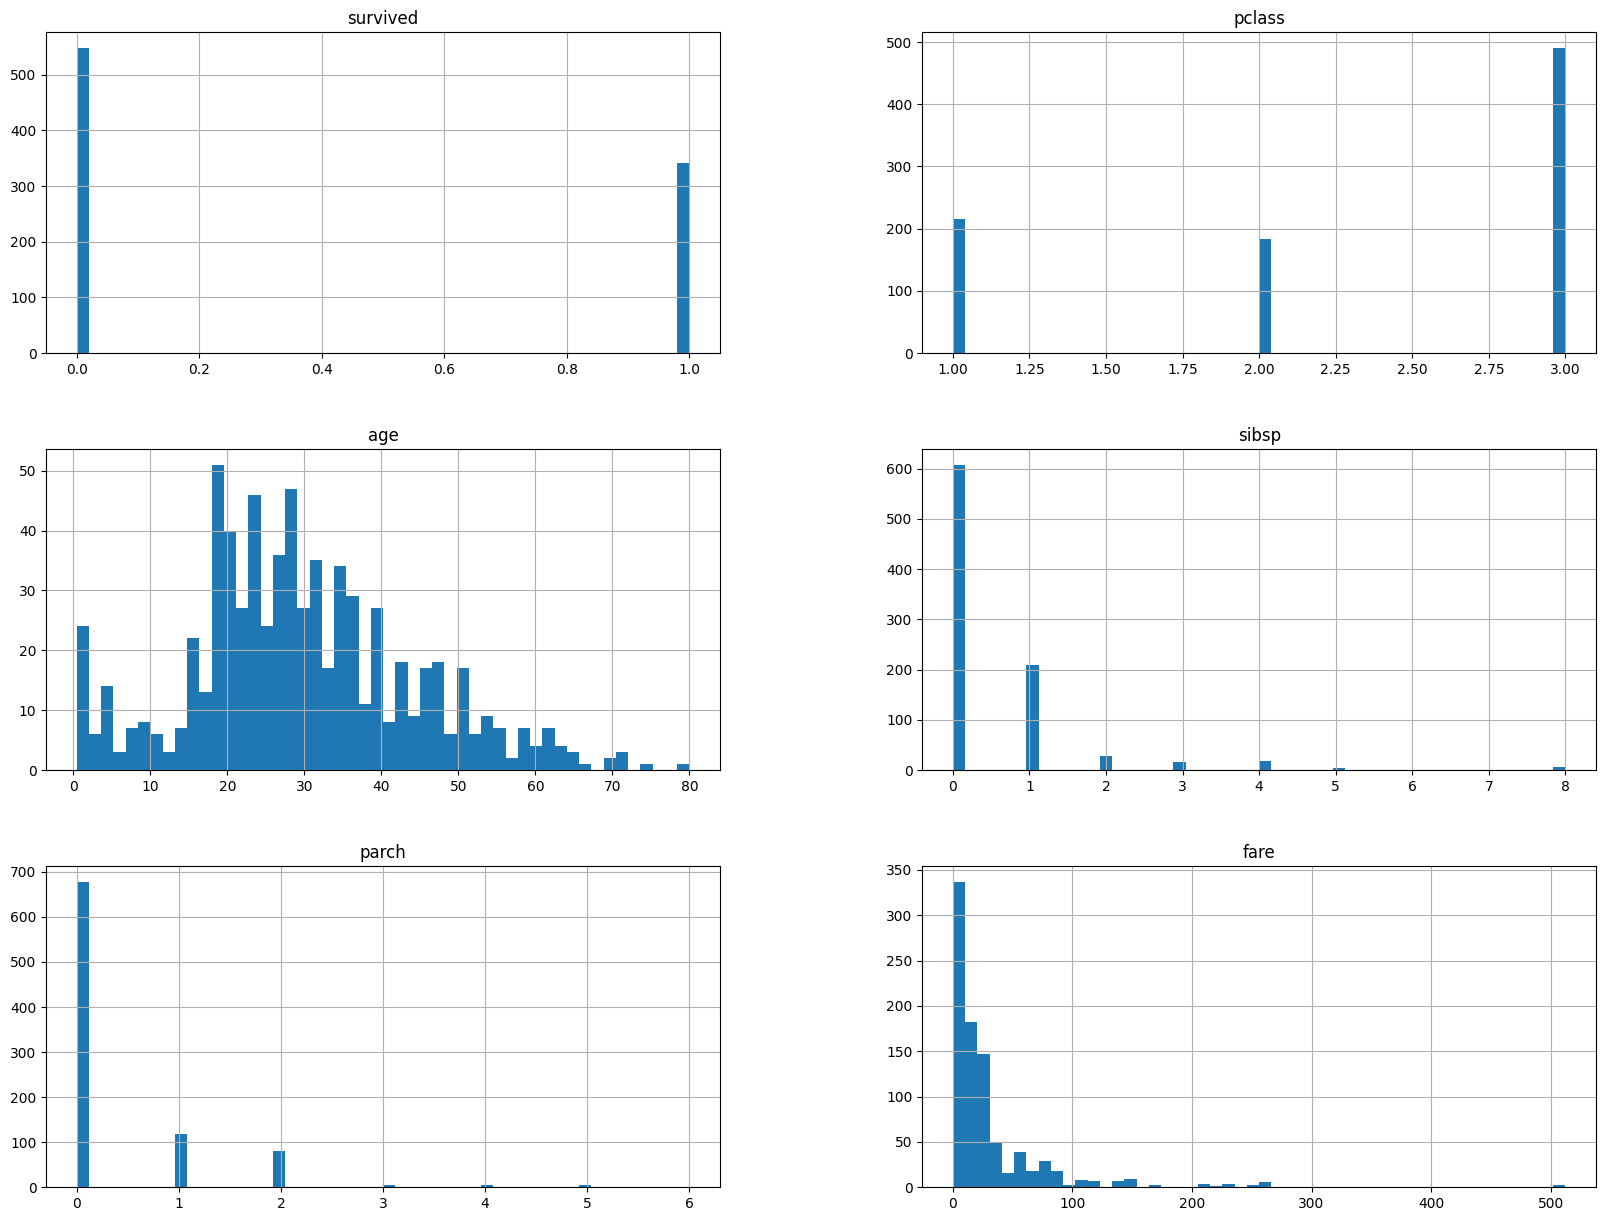

In [15]:
#Calculamos la distribción de las variables numéricas
df[Variables].hist(bins = 50, figsize=(20,15))
plt.show()

<Axes: >

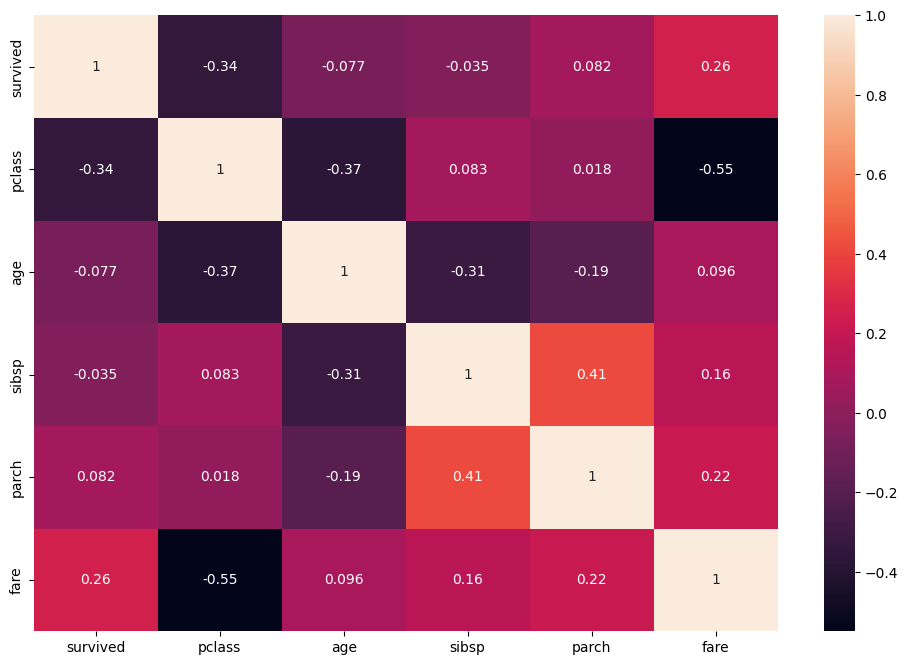

In [16]:
#Calculamos la correlación variables numéricas
corr = df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']].corr()
#corr = df[Variables].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

**Hallazgo 4:**

- Las variables numéricas que tiene más correlación con la variable target(sobrevivientes) son: fare (+) y pclass (-).

##### 4.2. Variables categóricas

In [17]:
categorical_attributes = df.select_dtypes(include=['object'])

In [18]:
categorical_attributes.dtypes

,0
sex,object
embarked,object
who,object
embark_town,object
alive,object


In [19]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False


In [20]:
df[['sex','survived']].groupby('sex').agg(['count','sum','mean'])

survived               
          count  sum      mean
sex                           
female      314  233  0.742038
male        577  109  0.188908

**Hallazgo 5:** Del total de sobrevivientes que representa un 38% de del total de tripulantes, podemos afirmar que aumenta a 74% (+36pp) si solo analizamos a la mujeres y cae a 19% (-19pp) si solo analizamos a los hombres.

In [21]:
df[['class','survived']].groupby('class').agg(['count','sum','mean'])

<ipython-input-21-88b82efc141b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['class','survived']].groupby('class').agg(['count','sum','mean'])


survived               
          count  sum      mean
class                         
First       216  136  0.629630
Second      184   87  0.472826
Third       491  119  0.242363

**Hallazgo 6:** Los tripulantes de 1ra clase tuvieron un % mayor de sobrevivientes con un 63%, mientras que los de 2da clase fueron el 47% y 3ra clase, el 24% de sobrevivientes.

In [22]:
df[['embark_town','survived']].groupby('embark_town').agg(['count','sum','mean'])

survived               
               count  sum      mean
embark_town                        
Cherbourg        168   93  0.553571
Queenstown        77   30  0.389610
Southampton      644  217  0.336957

**Hallazgo 7:**  Salvo los tripulantes de "Cherbourg" que obtuvieron el 55% de sobrevivientes, las demás categorías están cercanas al % total (38%)

#### 5. Tratamiento de Datos

- Reducir la dimensionalidad en caso sea necesario
- Aplicar un cambio de distribución de la variable numérica en caso sea necesario para reducir los outliers extremos
- Convertir variables categóricas a numericas
- Seleccionar variables + importantes


##### 5.1 Aplicar un cambio de distribución de la variable numérica para reducir los outliers extremos (de acuerdo al hallazgo encontrando en la variable Fare)

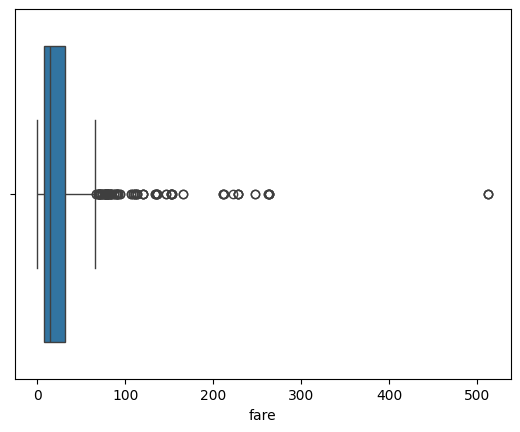

In [23]:
#Diagrama de Caja
sns.boxplot(data=df,x='fare')
plt.show()

In [24]:
df['fare'].describe()

,fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [27]:
df['fare'].quantile(np.arange(0,1,0.1))

,fare
0.0,0.0000
0.1,7.5500
0.2,7.8542
0.3,8.0500
0.4,10.5000
0.5,14.4542
0.6,21.6792
0.7,27.0000
0.8,39.6875
0.9,77.9583


In [29]:
df['fare'].quantile(np.arange(0.9,1,0.01))

,fare
0.90,77.95830
0.91,79.20000
0.92,82.17080
0.93,88.32294
0.94,93.50000
0.95,112.07915
0.96,133.99000
0.97,151.55000
0.98,211.33750
0.99,249.00622


In [28]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.97))
    return(x)

In [32]:
df_tratamiento = df[['fare']].apply(lambda x: outlier_capping(x))

In [33]:
df_tratamiento.head()

,fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500


In [34]:
df_tratamiento.quantile(np.arange(0.9,1,0.01))

,fare
0.90,77.95830
0.91,79.20000
0.92,82.17080
0.93,88.32294
0.94,93.50000
0.95,112.07915
0.96,133.99000
0.97,151.55000
0.98,151.55000
0.99,151.55000


In [35]:
df = pd.concat([df.drop(columns = ['fare']),df_tratamiento],axis = 1)

In [36]:
df['fare'].quantile(np.arange(0.9,1,0.01))

,fare
0.90,77.95830
0.91,79.20000
0.92,82.17080
0.93,88.32294
0.94,93.50000
0.95,112.07915
0.96,133.99000
0.97,151.55000
0.98,151.55000
0.99,151.55000


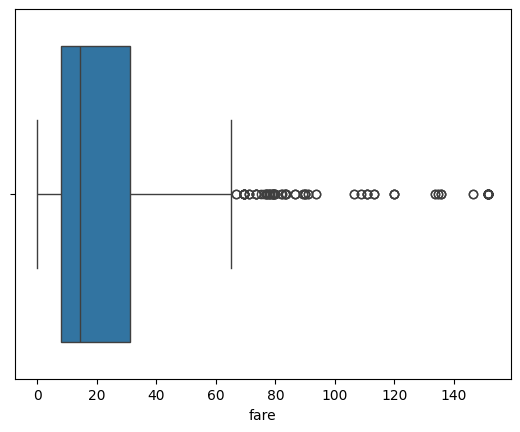

In [37]:
#fare aplicando el topeo al percentil 97
sns.boxplot(data=df,x='fare')
plt.show()

In [38]:
df['fare'].describe()

,fare
count,891.000000
mean,29.300121
std,34.295497
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,151.550000


##### 5.2 Imputar los valores nulos (de acuerdo al hallazgo encontrando en la variable Age, en el cual no se encontró una relación respecto a la variable Target pero para fines educativas se realiza el ejercicio)

In [39]:
df['age'].describe()

,age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [40]:
df['age'] = df['age'].fillna(28)

In [41]:
df['age'].describe()

,age
count,891.000000
mean,29.361582
std,13.019697
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   embarked     889 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  889 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
 13  fare         891 non-null    float64 
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [43]:
#Se aplica cuando la cantidad de registros nulos es mínimo (para la variable embarked)
df = df.dropna()

##### 5.3 Recategorizar las variables numéricas

In [44]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,embark_town,alive,alone,fare
0,0,3,male,22.0,1,0,S,Third,man,True,Southampton,no,False,7.2500
1,1,1,female,38.0,1,0,C,First,woman,False,Cherbourg,yes,False,71.2833
2,1,3,female,26.0,0,0,S,Third,woman,False,Southampton,yes,True,7.9250


In [45]:
# Recategorización de variables:
df.loc[ df['age'] <= 18, 'ageEncoded'] 					       = 0 # menores de edad
df.loc[(df['age'] > 18) & (df['age'] <= 26), 'ageEncoded'] = 1 # jovenes
df.loc[(df['age'] > 26) & (df['age'] <= 35), 'ageEncoded'] = 2 # Joven Adulto
df.loc[(df['age'] > 35) & (df['age'] <= 50), 'ageEncoded'] = 3 # Adulto
df.loc[(df['age'] > 50) & (df['age'] <= 65), 'ageEncoded'] = 4 # Adulto Maduro
df.loc[ df['age'] >=66, 'ageEncoded'] 					       = 5 # Anciano (Adulto Mayor)

In [46]:
# Fare
df.loc[ df['fare'] <= 7, 'fareEncoded'] 					       = 0 # Más baratos
df.loc[(df['fare'] > 7) & (df['fare'] <= 14), 'fareEncoded'] = 1 # menos caros
df.loc[(df['fare'] > 14) & (df['fare'] <= 31), 'fareEncoded'] = 2 # caros
df.loc[df['fare'] > 31, 'fareEncoded'] = 3 # Más caros

In [47]:
df.head()

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,embark_town,alive,alone,fare,ageEncoded,fareEncoded
0,0,3,male,22.0,1,0,S,Third,man,True,Southampton,no,False,7.2500,1.0,1.0
1,1,1,female,38.0,1,0,C,First,woman,False,Cherbourg,yes,False,71.2833,3.0,3.0
2,1,3,female,26.0,0,0,S,Third,woman,False,Southampton,yes,True,7.9250,1.0,1.0
3,1,1,female,35.0,1,0,S,First,woman,False,Southampton,yes,False,53.1000,2.0,3.0
4,0,3,male,35.0,0,0,S,Third,man,True,Southampton,no,True,8.0500,2.0,1.0


##### 5.4 Convertir variables categóricas a numerica

In [48]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,embark_town,alive,alone,fare,ageEncoded,fareEncoded
0,0,3,male,22.0,1,0,S,Third,man,True,Southampton,no,False,7.2500,1.0,1.0
1,1,1,female,38.0,1,0,C,First,woman,False,Cherbourg,yes,False,71.2833,3.0,3.0
2,1,3,female,26.0,0,0,S,Third,woman,False,Southampton,yes,True,7.9250,1.0,1.0


In [49]:
# sex
df['sexEncoded'] = df['sex'].map( {'female': 1, 'male': 2} ).astype(int)

In [50]:
# tipo de embarque
df['embarkedEncoded'] = df['embark_town'].map( {'Southampton': 1, 'Cherbourg': 2, 'Queenstown': 3} ).astype(int)

##### 5.5 Selección de variables

In [51]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,embark_town,alive,alone,fare,ageEncoded,fareEncoded,sexEncoded,embarkedEncoded
0,0,3,male,22.0,1,0,S,Third,man,True,Southampton,no,False,7.2500,1.0,1.0,2,1
1,1,1,female,38.0,1,0,C,First,woman,False,Cherbourg,yes,False,71.2833,3.0,3.0,1,2
2,1,3,female,26.0,0,0,S,Third,woman,False,Southampton,yes,True,7.9250,1.0,1.0,1,1


In [52]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked',
       'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone', 'fare',
       'ageEncoded', 'fareEncoded', 'sexEncoded', 'embarkedEncoded'],
      dtype='object')

In [53]:
drop_elements = ['sex', 'age','fare','embarked', 'class', 'who','adult_male', 'embark_town', 'alive', 'alone']
df_encoded = df.drop(drop_elements, axis = 1)

In [54]:
df_encoded.head(3)

,survived,pclass,sibsp,parch,ageEncoded,fareEncoded,sexEncoded,embarkedEncoded
0,0,3,1,0,1.0,1.0,2,1
1,1,1,1,0,3.0,3.0,1,2
2,1,3,0,0,1.0,1.0,1,1


<Axes: >

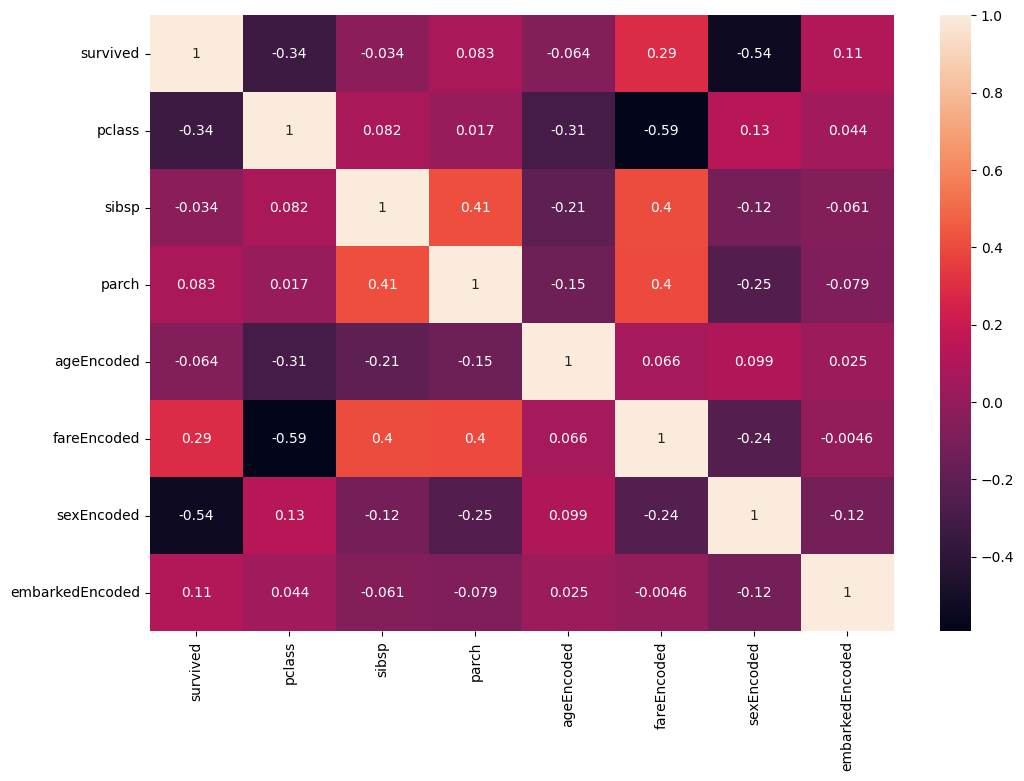

In [55]:
#Calculamos la correlación variables numéricas
corr = df_encoded.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

In [81]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

#Variables independientes
X=df_encoded.drop(['survived'], axis=1)
#Variable dependiente (Target)
y=df_encoded['survived']

#por defecto usa el método f_classif que usa anova-f
best=SelectKBest(k=3) #Coloca la cantidad de variables a tomar en cuenta
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['pclass', 'fareEncoded', 'sexEncoded'], dtype='object')


In [82]:
#Ejercicio cambiando a chi2
best=SelectKBest(chi2, k=3) #Coloca la cantidad de variables a tomar en cuenta
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['pclass', 'fareEncoded', 'sexEncoded'], dtype='object')
